In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [50]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


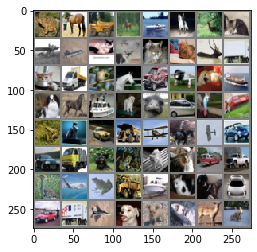

 frog horse truck  deer  ship horse  deer   cat plane plane   cat  deer   cat   dog  deer truck   cat truck  bird horse   car plane   dog  ship   dog horse  ship   dog  bird   car  bird   car  frog   cat   car truck plane horse plane   car   car truck   dog  frog   cat   cat truck truck  bird plane  frog truck  ship   cat   cat   car   car truck plane   dog   dog  ship  deer  deer


In [55]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(64)))

In [56]:
images.size(0)

64

In [57]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [58]:
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [59]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [60]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [61]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [62]:
import time

In [63]:
epochs = 1
train_time = time.time()
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
print("Training time elapsed: {:.4f}s".format(time.time() - train_time))

Finished Training
Training time elapsed: 4.2871s


epochs = 1
train_time = time.time()
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        if i + 1 == 12500:    # print final loss
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')
print("Training time elapsed: {:.4f}s".format(time.time() - train_time))

In [64]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

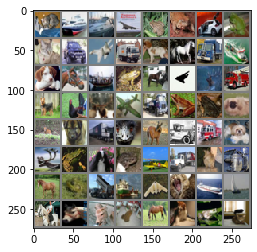

GroundTruth:    cat  ship  ship plane  frog  frog   car  frog   cat   car plane truck   dog horse truck  ship   dog horse  ship  frog horse plane  deer truck   dog  bird  deer plane truck  frog  frog   dog  deer   dog truck  bird  deer   car truck   dog  deer  frog   dog  frog plane truck   cat truck horse  frog truck  ship plane   cat  ship  ship horse horse  deer  frog horse   cat  frog   cat


In [66]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(64)))

In [67]:
net = Net().to(device)
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [68]:
outputs = net(images.to(device))

In [69]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(64)))

Predicted:    car  ship  ship   car   car   car truck   car  ship truck  ship  ship   car truck truck  ship  ship   car  ship  ship truck  ship   car   car   car  ship   car  ship truck   car   car   car   car   car truck   car   car truck truck  ship   car   car truck   car  ship  ship   car  ship   car   car truck  ship   car   car  ship   car  ship   car  ship   car   car   car truck truck


In [70]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 12 %


In [100]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(labels.size(0)):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane :  0 %
Accuracy of   car : 28 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse :  0 %
Accuracy of  ship : 61 %
Accuracy of truck : 32 %


# GaussianBlurを挟む

In [11]:
import cv2

In [12]:
def GaussianBlur_images(imgs, kernel_size, sigma):
    npimgs = imgs.numpy()
    imgs_list = []
    for img in npimgs:
         imgs_list.append(cv2.GaussianBlur(img.transpose(1, 2, 0), kernel_size, sigma))
    blurred_imgs = np.array(imgs_list)
    blurred_imgs = blurred_imgs.transpose(0, 3, 1, 2)
    return  torch.from_numpy(blurred_imgs)  # shape=(4, 3, 32, 32)

In [13]:
kernel_size = (3, 3)
sigma = 1

epochs = 10

In [14]:
net = Net().to(device)

In [15]:
train_time = time.time()
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs: 'data' is a list of [inputs, labels]
        inputs, labels = data[0], data[1].to(device)
        
        inputs = GaussianBlur_images(inputs, kernel_size, sigma)  
        inputs = inputs.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        if i + 1 == 12500:    # print final loss
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')
print("Training time elapsed: {:.4f}s".format(time.time() - train_time))

[1,  2000] loss: 2.305
[1,  4000] loss: 2.306
[1,  6000] loss: 2.305
[1,  8000] loss: 2.307
[1, 10000] loss: 2.305
[1, 12000] loss: 2.306
[1, 12500] loss: 2.307
[2,  2000] loss: 2.306
[2,  4000] loss: 2.305
[2,  6000] loss: 2.306
[2,  8000] loss: 2.306
[2, 10000] loss: 2.305
[2, 12000] loss: 2.306
[2, 12500] loss: 2.304
[3,  2000] loss: 2.306
[3,  4000] loss: 2.305
[3,  6000] loss: 2.306
[3,  8000] loss: 2.305
[3, 10000] loss: 2.306
[3, 12000] loss: 2.305
[3, 12500] loss: 2.306
[4,  2000] loss: 2.304
[4,  4000] loss: 2.307
[4,  6000] loss: 2.305
[4,  8000] loss: 2.305
[4, 10000] loss: 2.306
[4, 12000] loss: 2.306
[4, 12500] loss: 2.305
[5,  2000] loss: 2.305
[5,  4000] loss: 2.307
[5,  6000] loss: 2.306
[5,  8000] loss: 2.305
[5, 10000] loss: 2.306
[5, 12000] loss: 2.305
[5, 12500] loss: 2.305
[6,  2000] loss: 2.305
[6,  4000] loss: 2.305
[6,  6000] loss: 2.306
[6,  8000] loss: 2.304
[6, 10000] loss: 2.306
[6, 12000] loss: 2.307
[6, 12500] loss: 2.306
[7,  2000] loss: 2.305
[7,  4000] 

In [16]:
PATH_blurnet01 = '../params/cifar_blurnet01.pth'
torch.save(net.state_dict(), PATH_blurnet01)

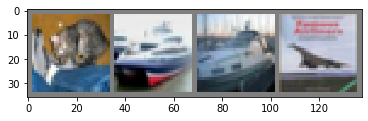

GroundTruth:    cat  ship  ship plane
Predicted:   frog  frog  frog  frog


In [17]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# predict
net = Net().to(device)
net.load_state_dict(torch.load(PATH_blurnet01))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [21]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test images: 10 %
Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog : 100 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


In [ ]:
train_time = time.time()
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs: 'data' is a list of [inputs, labels]
        inputs, labels = data[0], data[1].to(device)
        
        inputs = GaussianBlur_images(inputs, kernel_size, sigma)  
        inputs = inputs.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
        if i + 1 == 12500:    # print final loss
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')
print("Training time elapsed: {:.4f}s".format(time.time() - train_time))

In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0], data[1].to(device)
        images = GaussianBlur_images(images, kernel_size, sigma)  
        images = images.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test images: 10 %
Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer :  0 %
Accuracy of   dog :  0 %
Accuracy of  frog : 100 %
Accuracy of horse :  0 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


# エポックごとに変化させる


In [27]:
kernel_size = (3, 3)
sigma = 1

epochs = 10

net = Net().to(device)

train_time = time.time()
for epoch in range(epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs: 'data' is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
        
        if epoch == 0:
            inputs = inputs.cpu()
            inputs = GaussianBlur_images(inputs, kernel_size, sigma)  # とりあえず1エポック目だけぼかす
            inputs = inputs.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')
print("Training time elapsed: {:.4f}s".format(time.time() - train_time))

PATH_blurnet02 = './params/cifar_blurnet02.pth'
torch.save(net.state_dict(), PATH_blurnet02)

[1,  2000] loss: 2.304
[1,  4000] loss: 2.303
[1,  6000] loss: 2.303
[1,  8000] loss: 2.305
[1, 10000] loss: 2.305
[1, 12000] loss: 2.304
[2,  2000] loss: 2.304
[2,  4000] loss: 2.305
[2,  6000] loss: 2.304
[2,  8000] loss: 2.303
[2, 10000] loss: 2.304
[2, 12000] loss: 2.305
[3,  2000] loss: 2.304
[3,  4000] loss: 2.304
[3,  6000] loss: 2.304
[3,  8000] loss: 2.303
[3, 10000] loss: 2.304
[3, 12000] loss: 2.304
[4,  2000] loss: 2.304
[4,  4000] loss: 2.305
[4,  6000] loss: 2.303
[4,  8000] loss: 2.304
[4, 10000] loss: 2.304
[4, 12000] loss: 2.304
[5,  2000] loss: 2.303
[5,  4000] loss: 2.303
[5,  6000] loss: 2.305
[5,  8000] loss: 2.305
[5, 10000] loss: 2.304
[5, 12000] loss: 2.304
[6,  2000] loss: 2.303
[6,  4000] loss: 2.303
[6,  6000] loss: 2.305
[6,  8000] loss: 2.304
[6, 10000] loss: 2.304
[6, 12000] loss: 2.304
[7,  2000] loss: 2.304
[7,  4000] loss: 2.304
[7,  6000] loss: 2.304
[7,  8000] loss: 2.304
[7, 10000] loss: 2.304
[7, 12000] loss: 2.304
[8,  2000] loss: 2.304
[8,  4000] 

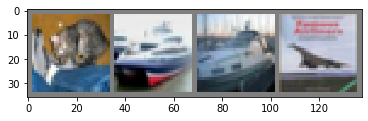

GroundTruth:    cat  ship  ship plane
Predicted:  horse horse horse  deer


In [28]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

# predict
net = Net().to(device)
net.load_state_dict(torch.load(PATH_blurnet02))
outputs = net(images.to(device))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

In [29]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 10000 test images: 9 %
Accuracy of plane :  0 %
Accuracy of   car :  0 %
Accuracy of  bird :  0 %
Accuracy of   cat :  0 %
Accuracy of  deer : 13 %
Accuracy of   dog :  0 %
Accuracy of  frog :  0 %
Accuracy of horse : 80 %
Accuracy of  ship :  0 %
Accuracy of truck :  0 %


In [1]:
kernel_size = [5, 5]

In [2]:
tuple(kernel_size)

(5, 5)

In [101]:
class AlexNet(nn.Module):
 
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
 
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x
 

In [104]:
alexnet = AlexNet()

In [105]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, 

In [113]:
# Alexnet
class New_AlexNet(nn.Module):
 
    def __init__(self, num_classes=10):
        super(New_AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 4 * 4, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
 
    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), 256 * 4 * 4)
        x = self.classifier(x)
        return x

In [114]:
new_alexnet = New_AlexNet()
new_alexnet

New_AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=4096, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5

In [1]:
for epoch in range(50):  # loop over the dataset multiple times
    train_loss, train_acc, val_loss, val_acc = 0, 0, 0, 0
    
    ### BLUR STEP SETTING ###
    if epoch < 10:
        kernel_size = (9,9)
        sigma = 3
    elif epoch < 20:
        kernel_size = (7,7)
        sigma = 2
    elif epoch < 30:
        kernel_size = (5,5)
        sigma = 1.5
    elif epoch < 40:
        kernel_size = (3,3)
        sigma = 1
    else:
        kernel_size = None
        sigma = None
    print(kernel_size)
    print(sigma)

(9, 9)
3
(9, 9)
3
(9, 9)
3
(9, 9)
3
(9, 9)
3
(9, 9)
3
(9, 9)
3
(9, 9)
3
(9, 9)
3
(9, 9)
3
(7, 7)
2
(7, 7)
2
(7, 7)
2
(7, 7)
2
(7, 7)
2
(7, 7)
2
(7, 7)
2
(7, 7)
2
(7, 7)
2
(7, 7)
2
(5, 5)
1.5
(5, 5)
1.5
(5, 5)
1.5
(5, 5)
1.5
(5, 5)
1.5
(5, 5)
1.5
(5, 5)
1.5
(5, 5)
1.5
(5, 5)
1.5
(5, 5)
1.5
(3, 3)
1
(3, 3)
1
(3, 3)
1
(3, 3)
1
(3, 3)
1
(3, 3)
1
(3, 3)
1
(3, 3)
1
(3, 3)
1
(3, 3)
1
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None


In [4]:
# convolution
H = 32
P = 1
K = 3
S = 1

print((H + 2*P - K) / S + 1)

32.0


In [5]:
# pooling
H = 55
P = 0
K = 3
S = 2

print((H + 2*P - K) / S + 1)

27.0
